# Paper Grading Assistant

## Data Wrangling and Pre-processing

Data comes from these links:
- https://components.one/datasets/all-the-news-2-news-articles-dataset/
- https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus
- https://www.kaggle.com/krsoninikhil/pual-graham-essays
- https://www.kaggle.com/c/asap-sas/data
- https://www.kaggle.com/c/asap-aes/data
- https://www.kaggle.com/thevirusx3/automated-essay-scoring-dataset

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxw2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxw2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train_docs = {
    'doc1' : "D:\\Kaggle\\asap-sas\\train.tsv",
    'doc2' : "D:\\Kaggle\\asap-aes\\training_set_rel3.tsv",
    'doc3' : "D:\\Kaggle\\paul-graham-essays\\paul_graham_essay.txt",
    'doc4' : "D:\\Kaggle\\all-the-news-2-1\\all-the-news-2-1.csv", # large file
    'doc5' : "gibberish" # bad input
} 

In [3]:
# Cleaning the text

def get_data(path):
    dataset = []
    
    if os.path.getsize(path) > 1 * 10^9:
        dataset = clean_big_file(path)
        return dataset
    if path.endswith('.tsv'):
        dataset = pd.read_table(path)
    elif path.endswith('.csv'):
        dataset = pd.read_csv(path)
    elif path.endswith('.txt'):
        with open(path) as file:
            for line in file:
                dataset.append(line.rstrip())
        file.close()
    else:
        dataset = ''
    return (dataset)

def strip_html(raw_html):
    clean_re = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    text = re.sub(clean_re, '', raw_html)
    return text

def lem_stem_text(text):
    # remove handles and urls specifically
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    # remove anything not a letter
    text = re.sub('[^a-zA-Z]', ' ', text)

    text = text.lower()
    text = text.split()
    
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    
    text1 = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    text2 = [wnl.lemmatize(word) for word in text if not word in set(all_stopwords)]
    text1 = ' '.join(text1)
    text2 = ' '.join(text2)
    return text1, text2
    
def clean_big_file(file):
    data = []
    count = 0
    
    import csv
 
    with open(file, newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        
        try:
            for line in csv_file:
                if count < 500:
                    data.append(line)
                    count += 1
                else:
                    break
        except:
            print("Unexpected error:", sys.exc_info())
            count += 1
            pass
    csv_file.close()
    header = data.pop(0)
    return data
    
def clean_df(df):
    cols = df.columns
    print(cols)
    target = input("Which column has the text? Copy and paste here: ")
    print(target)
    clean_text = []
    for i in range(len(df)):
        try:
            text = strip_html(df[target][i])
            text1, text2 = lem_stem_text(text)
            clean_text.append([text1, text2])
        except:
            pass
#     print(clean_text)
    return clean_text

def clean_list(lst):
    print('processing text data...')
    clean_text = []
    for i in range(len(lst)):
        try:
            lst[i] = lst[i].strip()
            if len(lst[i]) < 2: # removes random empty lines
                lst.pop(i)
                continue
            text = strip_html(lst[i])
            text1, text2 = lem_stem_text(text)
            clean_text.append([text1, text2])
        except IndexError:
            break
        except:
            print("Unexpected error:", sys.exc_info())
            pass
#     print(clean_text)
    return clean_text

def process_data(data):
    if isinstance(data, pd.DataFrame):
        return clean_df(data)
    elif isinstance(data, list):
        return clean_list(data)
    else:
        print('data type not recognized')
        return ''
    

In [4]:
data = clean_big_file("D:\\Kaggle\\all-the-news-2-1\\all-the-news-2-1.csv")
data = clean_list(data)
data[:5]

processing text data...


[['lee drutmanw take concern health liber democraci seriouslythi post part polyarchi independ blog produc polit reform program new america washington think tank devot develop new idea new voic imagin otherwis healthi someth start feel weird sometim short breath get migrain feet start swell littl otherwis everyth seem fine go doctor doctor run test tell youit probabl noth could sign come heart attack push certainti doctor tell she not sure human bodi complex system your young otherwis pretti healthi could plenti explan your feel littl worri safe side mayb reduc stress life eat healthier diet would your sensibl person youd probabl err side precaut sure might noth worri likelihood heart attack might low even low chanc low chanc someth possibl fatal take chanc especi recommend less stress healthier diet good either way offer parabl way think debat that emerg past two week respons amanda taub new york time articl profil new find roberto stefan foa yascha mounk find rais alarm fact younger p

In [5]:
all_data = []
for key in train_docs.keys():
    try:
        data = get_data(train_docs[key])
        big_data = process_data(data)
        all_data.append(big_data)
    except:
        print("Unexpected error: ", sys.exc_info())

processing text data...
Unexpected error: (<class 'UnicodeDecodeError'>, UnicodeDecodeError('utf-8', b's top doctors that too much time spent on the computer can cause damage to your health. Exercise is highly stressed by doctors around the globe and the only exercise a computer addict will be doing is typing up a storm. They can submerge themselves into obesity. This often causes depression as it begins to sink in. Addition itself is a serious health issue. I wouldn\'t be surprised if they add a computer wing to rehab centers sometime in the near future. These problems are slowly spreading and we must come together to abolish them! Family time is an treasured value, to the @CAPS2 people, but lately, computers are ruining this tradition. With so @CAPS1 people absorbed with online drama, friends, and even video games, family interaction is declining. People slowly remove themselves from reality and enter an alternate world of cyberspace. They @MONTH1 only emerge from their rooms to use 

In [6]:
all_data[0][:5]

[['addit inform would need replic experi much vinegar place ident contain tool use measur mass four differ sampl much distil water use rins four sampl take vinegar',
  'additional information would need replicate experiment much vinegar placed identical container tool use measure mass four different sample much distilled water use rinse four sample taking vinegar'],
 ['read expir realiz addit inform need replic expirei one amant vinegar pour contain two label contain start yar expir three write conclus make sure yar result accur',
  'reading expirement realized additional information need replicate expireiment one amant vinegar poured container two label container start yar expirement three write conclusion make sure yar result accurate'],
 ['need trial control set exact amount vinegar pour cupbeak could also take check mass everi min hour',
  'need trial control set exact amount vinegar pour cupbeaker could also take check mass every min hour'],
 ['student list rock better rock wors p

In [7]:
all_data[1][:5]

[['dear local newspap think effect comput peopl great learn skillsaffect give us time chat friendsnew peopl help us learn globeastronomi keep us trobl thing dont think would feel teenag alway phone friend ever time chat friend buis partner thing well there new way chat comput plenti site internet organ organ cap facebook myspac ect think set meet boss comput teenag fun phone not rush get caus want use learn countrysst outsid well computerinternet new way learn go time might think child spend lot time comput ask question economi sea floor spread even date youll surpris much hesh know believ not comput much interest class day read book child home comput local librari better friend fresh perpressur someth know isnt right might not know child cap forbidd hospit bed drivebi rather child comput learn chat play game safe sound home commun place hope reach point understand agre comput great effect child give us time chat friendsnew peopl help us learn globe believ not keep us trobl thank liste

In [8]:
all_data[2][:5]

[['fma exampl gener surpris hard', 'fma example general surprising hard'],
 ['combin achiev territori tend pick',
  'combination achieve territory tends picked'],
 ['clean precis insight valuabl', 'clean precisely insight valuable'],
 ['either surpris without gener eg', 'either surprising without general eg'],
 ['gossip gener without surpris eg', 'gossip general without surprising eg']]

In [9]:
all_data[3][:5]

[['lee drutmanw take concern health liber democraci seriouslythi post part polyarchi independ blog produc polit reform program new america washington think tank devot develop new idea new voic imagin otherwis healthi someth start feel weird sometim short breath get migrain feet start swell littl otherwis everyth seem fine go doctor doctor run test tell youit probabl noth could sign come heart attack push certainti doctor tell she not sure human bodi complex system your young otherwis pretti healthi could plenti explan your feel littl worri safe side mayb reduc stress life eat healthier diet would your sensibl person youd probabl err side precaut sure might noth worri likelihood heart attack might low even low chanc low chanc someth possibl fatal take chanc especi recommend less stress healthier diet good either way offer parabl way think debat that emerg past two week respons amanda taub new york time articl profil new find roberto stefan foa yascha mounk find rais alarm fact younger p

## First Glance

all_data[1] looks to be the most interesting data set for this project, so we'll use that one going forward.

In [10]:
# Run the utilty functions from a seperate notebook
%run topic_model_utils.ipynb

data = pd.read_csv("D:\\Kaggle\\asap-aes\\training_set_rel3.tsv", sep='\t')
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxw2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxw2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# tokenize essays
data['tokenized_essay'] = data.essay.apply(process_text)
# drop some unused features
cols_to_drop = [col for col in data.columns if 'rater' in col]
data = data.drop(columns=cols_to_drop)

In [12]:
data.head()

,essay_id,essay_set,essay,domain1_score,domain2_score,tokenized_essay
0,1,1,"Dear local newspaper, I think effects computer...",8,NaN,"[dear, local, newspaper, think, effect, comput..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN,"[dear, believe, using, computer, benefit, way,..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN,"[dear, people, use, computer, agrees, benefit,..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN,"[dear, local, newspaper, expert, computer, ben..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,NaN,"[dear, location, know, having, computer, posit..."


In [13]:
# examine what looks like the dependent variable
data['domain1_score'].value_counts()

3     2830
2     2445
1     1736
4     1424
8      737
0      418
9      383
10     372
16     199
11     165
7      163
40     161
17     160
6      137
12     133
18     118
14     105
20     103
24      99
5       96
19      88
15      86
13      82
21      70
36      65
22      63
23      53
30      49
35      47
37      39
34      39
32      37
31      34
33      32
45      31
42      23
41      22
38      20
43      15
44      14
50      13
46      13
28      11
29       8
39       8
47       7
27       6
25       5
26       4
48       3
49       2
55       2
60       1
Name: domain1_score, dtype: int64

In [14]:
data['domain1_score'].unique()

array([ 8,  9,  7, 10,  6, 12,  4,  3, 11,  2,  5,  1,  0, 15, 13, 17, 23,
       16, 18, 19, 14, 21, 24, 20, 22, 34, 46, 40, 30, 26, 41, 31, 44, 36,
       43, 45, 35, 42, 33, 38, 47, 32, 50, 39, 37, 55, 60, 28, 49, 29, 27,
       25, 48], dtype=int64)

It seems like the scores are really all over the place. 

Glacing at the information on the data set, each essay set has a different scale. 

So the next step would be to standardize the scales between essay sets.

In [30]:
# at this point, I'm not sure about the 
# domain2_score, so I'll just keep it for now.

# replace NaN w/ 0
data = data.fillna(0)

# add a max_score column to use later 
# for standardizing scores, as all the 
# different essays sets have different 
# scales on which they were scored
data['max_score'] = 0
essay_sets = data.essay_set.unique()

for set_ in essay_sets:
    if set_ == 1:
        data.loc[data.essay_set == set_, 'max_score'] = 12
    if set_ == 2:
        data.loc[data.essay_set == set_, 'max_score'] = 10
    if set_ == 3 or set_ == 4:
        data.loc[data.essay_set == set_, 'max_score'] = 3
    if set_ == 5 or set_ == 6:
        data.loc[data.essay_set == set_, 'max_score'] = 4
    if set_ == 7:
        data.loc[data.essay_set == set_, 'max_score'] = 30
    if set_ == 8:
        data.loc[data.essay_set == set_, 'max_score'] = 60
# spot checking some of the data
print(data.loc[data.essay_set == 1, 'max_score'][:5])
print(data.loc[data.essay_set == 4, 'max_score'][:5])
print(data.loc[data.essay_set == 7, 'max_score'][:5])
print(data.loc[data.essay_set == 8, 'max_score'][:5])

0    12
1    12
2    12
3    12
4    12
Name: max_score, dtype: int64
5309    3
5310    3
5311    3
5312    3
5313    3
Name: max_score, dtype: int64
10684    30
10685    30
10686    30
10687    30
10688    30
Name: max_score, dtype: int64
12253    60
12254    60
12255    60
12256    60
12257    60
Name: max_score, dtype: int64


In [16]:
# create temp column for 
# model's later internal classes
data['temp'] = 0
for set_ in essay_sets:
    if set_ == 2:
        data.loc[data.essay_set == set_, 'temp'] = (data.loc[data.essay_set==set_,'domain1_score'] \
                                                   + data.loc[data.essay_set==set_,'domain2_score']) \
                                                   / data.loc[data.essay_set==set_,'max_score']
        continue
    else:
        data.loc[data.essay_set == set_, 'temp'] = data.loc[data.essay_set==set_,'domain1_score'] \
                                                   / data.loc[data.essay_set==set_,'max_score']

In [17]:
# re-classify each paper on a scale of 1-5,
# with 5 being a high score (like an A on an 
# ABCDF scale)
data['class'] = 1
for x in range(len(data)):
    if (data.temp[x]) >= .9:
        data['class'][x] = 5
        continue
    elif data.temp[x] >= .8 and data.temp[x] < .9:
        data['class'][x] = 4
        continue
    elif data.temp[x] >= .7 and data.temp[x] < .8:
        data['class'][x] = 3
        continue
    elif data.temp[x] >= .6 and data.temp[x] < .7:
        data['class'][x] = 2

<ipython-input-17-cebdbcdee144>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'][x] = 2
<ipython-input-17-cebdbcdee144>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'][x] = 3
<ipython-input-17-cebdbcdee144>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'][x] = 4
<ipython-input-17-cebdbcdee144>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [18]:
data.head()

,essay_id,essay_set,essay,domain1_score,domain2_score,tokenized_essay,max_score,temp,class
0,1,1,"Dear local newspaper, I think effects computer...",8,0.0,"[dear, local, newspaper, think, effect, comput...",12,0.666667,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.0,"[dear, believe, using, computer, benefit, way,...",12,0.750000,3
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,0.0,"[dear, people, use, computer, agrees, benefit,...",12,0.583333,1
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,0.0,"[dear, local, newspaper, expert, computer, ben...",12,0.833333,4
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,0.0,"[dear, location, know, having, computer, posit...",12,0.666667,2


<AxesSubplot:>

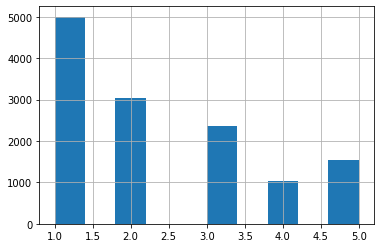

In [19]:
data['class'].hist()

In [20]:
data['word_count'] = data.essay.apply(word_count)
data['token_count'] = data.tokenized_essay.apply(len)
data.head()

,essay_id,essay_set,essay,domain1_score,domain2_score,tokenized_essay,max_score,temp,class,word_count,token_count
0,1,1,"Dear local newspaper, I think effects computer...",8,0.0,"[dear, local, newspaper, think, effect, comput...",12,0.666667,2,338,145
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.0,"[dear, believe, using, computer, benefit, way,...",12,0.750000,3,419,176
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,0.0,"[dear, people, use, computer, agrees, benefit,...",12,0.583333,1,279,117
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,0.0,"[dear, local, newspaper, expert, computer, ben...",12,0.833333,4,524,240
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,0.0,"[dear, location, know, having, computer, posit...",12,0.666667,2,465,171


<AxesSubplot:>

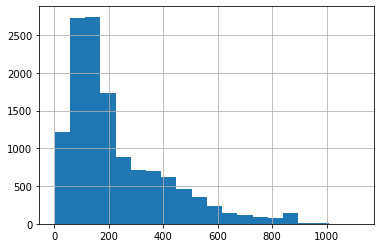

In [21]:
data['word_count'].hist(bins=20)

<AxesSubplot:>

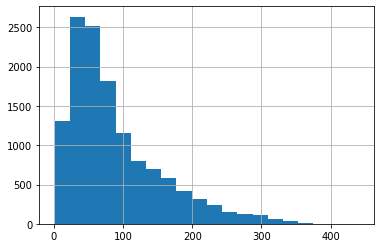

In [22]:
data['token_count'].hist(bins=20)

In [29]:
np.percentile(data['token_count'], 95)

228.0

In [28]:
np.percentile(data['word_count'], 95)

600.25

If I need to truncate / pad any data with the models, 228 tokens and 600 words look like it may be a good point to at least start with truncating or padding lengths to.

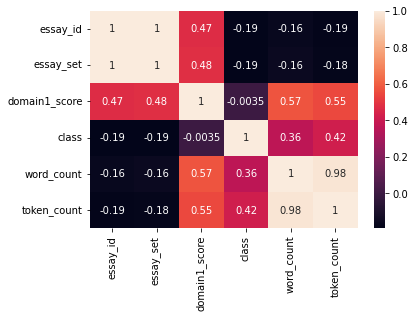

In [25]:
# The counts are almost the same between words
# and tokens, but the scale for tokens is half 
# that of words. Addtionally, the grades 
# mostly skew low, which probably means there 
# will be some skew in the model later.

# Now let's see what features correlate the
# best with grades.
import seaborn as sns

cols = ['essay_id', 'essay_set', 'domain1_score', 'class', 'word_count', 'token_count']
quant_word_data = data[cols]
coef = np.corrcoef(quant_word_data.T)
ax = sns.heatmap(coef, xticklabels=cols, yticklabels=cols, annot=True)

Word count and token count are the most highly correlated with class and domain1_score, which I guess makes sense in some ways, but also has some pitfalls.

Well-organized, thoughtful writing will take some space to develop, so it makes sense that better writing has more words.

On the other hand, if the paper is just filled with non-sense words, the models will probably still think it's good writing.

So that's probably the first assumption: the model depends on a good-faith try from the student whose work is being graded.